# MovieBusters

## Introduction

The movie industry has been filled with intruiging what-ifs. It can be Will Smith turning down the role of Neo in the Matrix. Nicholas Cage had been cast as Superman, but he only had time to try out the Superman costume before the movie got cancelled. The industry has been characterized by uncertainty which has left fans wondering what might have been. 

But, for peoplpe behind the camera, this uncertainity is not good enough. With MovieBusters, our goal is to reduce the erraticness and help movie houses with the decision making process which is backed with data and AI. We aim at using historical film data acquired from sources like IMDB and The Numbers to tease out hidden patterns which can aid filmmakers like editors, writers, directors and actors in taking the right decision. 

The dataset scrapped from the above websites consist of film reated attributes like the year, the crew, boxoffice collection, audiience reviews and the movie summary. This data is cleaned to set the stage for further processing  which is then followed by analysis and predictions based on machine learning. 

We will answer the follwoing questions:


#### 1. Which directors and actors are the production companies targeting? Are production companies choosing actors based on genres?
We will analyze the data to show which directors, production houses go to for a certain type of film/genre. We want to know directors who are more diverse with respect to the genres. 

#### 2. Do production companies target certain demographics? Does this vary by country?
We will analyze the country, language and year data to see if there is a trend that production houses follow to select the target country. Additionally, we want to identify the trend in the languages that the movies have been made in over the years.

#### 3. Which directors and actors are the production companies targeting? 
We want to see whether the actors targeted by the production companies match up with the actors who generate significantly high ratings. If there is a match, we can infer that the production companies are targeting these actors likely because they generate high profits. However, if the actors are not matched, we can infer that there might be some other reasons that the production companies are targeting these actors. 

#### 4. Do producers or production companies strategize release dates for certain kinds of films?
We want to identify the pattern int he movie release dates that the production houses follow. Additionally, we want to see if there is a correlation between the movie date and the boxoffice returns. 

#### 5. Are there specific keywords in the movie descriptions that tend to be more appealing to the audience?
We will split the description into several phrases and analyze the frequency of each phrase/ word to check if any of them are correlated to the popularity of the movie. 

## Choice on Data Processing or Data Analysis
We choose **data analysis** as our main focus. We have successfully created several visualizations that demonstrate the answer for each questions. In addition, we also use natural language processing to process and analyze text data and build a model to conduct a prediction.

## Data Processing
We have conducted the following steps to perform data processing, and the details will be explained in each part. 

### 1. Data Acquisition

The following code will be working on the data provided in- **IMDb movies.csv** <br> 
We'll first import all required libraries :

In [1]:
# Importing libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We need to load the **IMDb movies.csv** file using `pd.read_csv`. File path needs to be changed accordingly based on your file location.

In [2]:
#Importing the IMDb Movies dataset
imdb = pd.read_csv('IMDb movies.csv',dtype={'year': str})
imdb.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


We will be using [The Numbers](https://www.the-numbers.com/) website to impute the missing values in the Worldwide_Gross_Income column

The following code will scrape data from the website and it takes very long to complete execution due to large amount of pages being examined, so we only execute it once and store the result in the `money.xlsx` file.<br> **Please avoid running the following cell!!**

In [3]:
#Scraping data from The Numbers website
first_movie_index = 1
last_movie_index = 32901
movies_on_each_page = 100
df_name = pd.DataFrame()
df = pd.DataFrame()
for movie in range (first_movie_index,last_movie_index,movies_on_each_page):
    url = 'https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time/' + str(movie)
    page = requests.get(url)
    page_soup = BeautifulSoup(page.text, 'html.parser')
    
    for n in range(81,281,2):
        df_name = df_name.append({'Year' : page_soup.find_all(name="a")[n].text, 'Movie' : page_soup.find_all(name="a")[n+1].text}, ignore_index = True)

    for x in range(0,300,3):
        df = df.append({'Worldwide Box Office' : page_soup.find_all(name = "td", align = 'right')[x].text, 'Domestic Box Office' : page_soup.find_all(name = "td", align = 'right')[x+1].text, 'International Box Office' : page_soup.find_all(name = "td", align = 'right')[x+2].text}, ignore_index = True)
    
money = pd.concat([df_name, df], axis=1)
money.to_excel("money.xlsx")

We need to load the **money.xlsx** file using `pd.read_excel`

In [4]:
#Importing the two dataset we are going to use
money = pd.read_excel('money.xlsx')

Then, We will use the movie name as the key to merge the 2 dataframes

In [5]:
# Converting the movie names to lower case and removing any spaces in the names for better match
imdb['Movietemp'] = imdb['original_title'].str.replace(' ','').str.lower()
money['Movietemp'] = money['Movie'].str.replace(' ','').str.lower()


We compare the box office data from both the dataset to check if they are valid

In [6]:
# merge money and imdb dataframe
df = pd.merge(money,imdb, on=['Movietemp'], how='inner')

We display the first 20 rows to validate the consistence

In [7]:
df[['Worldwide Box Office','worlwide_gross_income']].head(20)

,Worldwide Box Office,worlwide_gross_income
0,"$2,845,899,541",$ 2790439092
1,"$2,797,800,564",$ 2797800564
2,"$2,207,986,545",NaN
3,"$2,207,986,545",NaN
4,"$2,207,986,545",$ 2195169869
5,"$2,044,540,523",$ 2048359754
6,"$1,669,979,967",$ 1670401444
7,"$1,654,367,425",$ 968511805
8,"$1,654,367,425",$ 1656963790
9,"$986,214,868",$ 968511805


The worldwide Box Office column has been scrapred from the The Numbers website and the `worlwide_gross_income` column is from the IMDB dataset. We have merged the 2 dataframes to verify that the gross income data integrity is maintained. We can see that the numbers of the income data matches and hence, we can confirm that the IMDB data is accurate.

We will then try to impute missing values in  the worlwide_gross_income column with the corresponding values in Worldwide Box Office

In [8]:
# merge money and imdb dataframe
final = pd.merge(imdb,money, on=['Movietemp'], how='left')

Display the number of worlwide gross income before imputing any values

In [9]:
print(f"Before Imputing \n{final[['worlwide_gross_income','Worldwide Box Office']].count()}\n")

Before Imputing 
worlwide_gross_income    32428
Worldwide Box Office     23108
dtype: int64



Next, we impute missing values with the corresponding values in Worldwide Box Office

In [10]:
final.loc[final['worlwide_gross_income'].isnull(), 'worlwide_gross_income'] = final.loc[final['worlwide_gross_income'].isnull(), 'Worldwide Box Office']


Display the number of worlwide gross income after imputing any values

In [11]:
print(f"After Imputing \n{final[['worlwide_gross_income','Worldwide Box Office']].count()}")

After Imputing 
worlwide_gross_income    37380
Worldwide Box Office     23108
dtype: int64


We can finally see that there are approximately 5000 rows more missing value having been imputed

### 2. DATA CLEANING
We will use the following ways to clean the data:
- Change column name to be more informative
- Delete columns that do not provide any information for analysis
- Drop duplicate columns 
- Substitute reasonable values for missing values

#### 1. Column name manipulation
The column names are in lower case. We will convert the first letter of each name into capital

In [12]:
# Making the first letter of the column names capital
final.columns= final.columns.str.title()

#### 2. Dropping columns
    1) Metascore column as we will be using the the IMDB ratings for our analysis
    2) Movietemp column because we just used it for merging 
    3) Year_x and Year_y as we will be using Date_published column
    4) Worldwide Box Office, Domestic Box Office and International Box Office as we will only be using worldwide_gross_income for our analysis
    5) Movie and Title as we will be using original_title column 
    6) Unnamed: 0 as it is redundant

In [13]:
final

,Imdb_Title_Id,Title,Original_Title,Year,Date_Published,Genre,Duration,Country,Language,Director,...,Metascore,Reviews_From_Users,Reviews_From_Critics,Movietemp,Unnamed: 0,Movie,Year,Domestic Box Office,International Box Office,Worldwide Box Office
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,NaN,1.0,2.0,missjerry,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,NaN,7.0,7.0,thestoryofthekellygang,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,NaN,5.0,2.0,densortedrøm,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,NaN,25.0,3.0,cleopatra,2211.0,Cleopatra,1963.0,"$57,000,000","$14,000,000","$71,000,000"
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,NaN,31.0,14.0,l'inferno,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88065,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,NaN,NaN,4.0,lelion,10399.0,Le lion,2020.0,NaN,"$3,474,474","$3,474,474"
88066,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,NaN,6.0,4.0,debeentjesvansint-hildegard,7994.0,De Beentjes Van Sint-Hildegard,2020.0,NaN,"$7,723,484","$7,723,484"
88067,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,NaN,NaN,NaN,padmavyuhathileabhimanyu,NaN,NaN,NaN,NaN,NaN,NaN
88068,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,NaN,NaN,NaN,sokaginçocuklari,NaN,NaN,NaN,NaN,NaN,NaN


We drop unnecessary columns

In [14]:
final.drop(['Metascore','Title','Movietemp','Year','Usa_Gross_Income','Domestic Box Office','Worldwide Box Office','International Box Office','Movie','Title','Unnamed: 0'],axis =1,inplace = True)


#### 3. Format standardization and conversion
We will standardize the Date_Published column by removing all the rows which don't have full date available and then converting it to datetime format as it will be useful for time series analysis.

In [15]:
final = final[final['Date_Published'].str.contains('\d{4}-\d{2}-\d{2}') == True].copy()

In [16]:
final.loc[:,'Date_Published'] = pd.to_datetime(final.loc[:,'Date_Published'], format='%Y-%m-%d')

#### 4. Unnecessary unit removal
We try to remove dollar sign '$' from Budget and Worlwide_Gross_Income column

In [17]:
# Using str.replace to filter out any non numerical values in the columsn
pattern = '[^\d]'
final.loc[:,'Budget'] = final.loc[:,'Budget'].str.replace(pattern,'',regex = True)
final.loc[:,'Worlwide_Gross_Income'] = final.loc[:,'Worlwide_Gross_Income'].str.replace(pattern,'',regex = True)

Then, we provide a more informative column name 

In [18]:
# Renaming the columns
final.rename(columns = {'Budget':'Budget($)', 'Worlwide_Gross_Income':'Box_Office($)'}, inplace=True)

## Data Analysis
We come up with 5 questions, and solve each question in ways we think is appropriate to get some insights. 

 ### Question 1:
 

The following code takes the columns from the final excel and puts its into another dataframe for further use. 

In [19]:
gdap=final[['Genre','Director','Actors','Production_Company']]
gdap.head()

,Genre,Director,Actors,Production_Company
0,Romance,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",Alexander Black Photoplays
1,"Biography, Crime, Drama",Charles Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",J. and N. Tait
2,Drama,Urban Gad,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Fotorama
3,"Drama, History",Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",Helen Gardner Picture Players
4,"Adventure, Drama, Fantasy","Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Milano Film


In [20]:
directgenre= gdap.groupby(by='Director')['Genre'].count().sort_values(ascending=False).head(4)
pd.DataFrame(directgenre) #this code combines the directors and genres columns 
#and shows the top 4 directors

,Genre
Director,
Michael Curtiz,86
Lesley Selander,77
William Beaudine,71
Jesús Franco,70


From this dataframe, it can be seen that the director, Michael Curtiz, produces the most genres of movies.

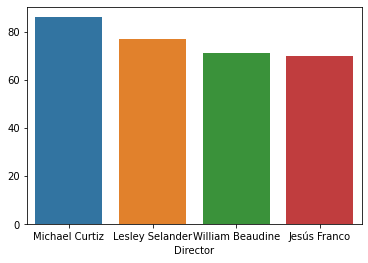

In [21]:
sns.barplot(x=directgenre.index, y= directgenre.values);

Inference: These 4 directors have higher viewer rates because they produce the most variety of movies. Each customer is different which means each customer likes to watch different genres of movies. By a director producing many genres of movies they can capture more of an audience which leads to more money being made and a high viewer rate. This does not nesscessarily mean that the movies has to be good and rated high in terms of quality. This just means more people watch their movies since they have movies in many different genres.

### Question 2: 
We will analyze the trend of movie languages by years.

In [22]:
#get a series of all the movie production year
year = final['Date_Published'].dt.year
#get a series of all the languages of the movies
language = final['Language']
#create a new dataframe with the years and languages extracted from the original dataframe
df_language = pd.DataFrame({'language':language,
                   'year':year})
#drop all the missing values from the new dataframe
df_language = df_language.dropna()

In [23]:
#count the amount of movies produced in different languages
df_language['language'].value_counts()

English                                35315
French                                  3864
Japanese                                2775
Spanish                                 2774
Italian                                 2687
                                       ...  
English, Japanese, Italian, Spanish        1
Norwegian, English, Swedish, Saami         1
Spanish, Hebrew, Ladino                    1
German, Japanese, English                  1
German, Swiss German, Afrikaans            1
Name: language, Length: 4299, dtype: int64

We will exclude the movies produced in English for the following analysis, since it is too obvious that the majority of movies are spoken in English. We will examine the result of the other top languages. 

Some movies have more than one language, so we need to split the multi-languages values.

In [24]:
#splitting the multi-languages values by a coma followed by a space and give it an index of the year
df_language = pd.DataFrame(df_language['language'].str.split(', ').to_list(), index = df_language['year']).stack()

In [25]:
#reset the index
df_language = df_language.reset_index('year')

In [26]:
#give df_language columns of year and language
df_language.columns = ['year','language']

In [27]:
#group by both the year and the language, and count how many movies are produced in that specific language, in that year
df_lan_final = df_language.reset_index().groupby(['year','language'], as_index=False).count().rename(columns={'index':'count'})
df_lan_final

,year,language,count
0,1894,None,1
1,1906,None,1
2,1911,Italian,1
3,1912,English,2
4,1912,French,1
...,...,...,...
5007,2020,Ukrainian,10
5008,2020,Vietnamese,3
5009,2020,Welsh,1
5010,2020,Yiddish,3


Since we just want to look at the top 3 languages other than English, we split each language into an individual dataframes

In [28]:
#get the data for movies produced in French only
test_French = df_lan_final[df_lan_final['language'] == 'French']
#get the data for movies produced in Japanese only
test_Italian = df_lan_final[df_lan_final['language'] == 'Italian']
#get the data for movies produced in Spanish only
test_Spanish = df_lan_final[df_lan_final['language'] == 'Spanish']

Text(0.5, 1.0, 'The Amount of Movies Produced in Different Languages Over Time')

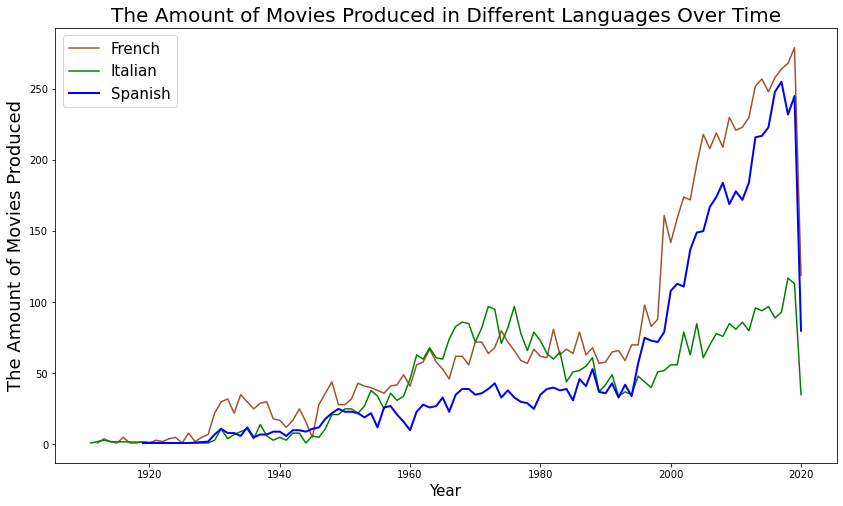

In [29]:
#create an empty plot first
fig, ax = plt.subplots(figsize=(14, 8))
#plot three lines for each language
plt.plot(test_French['year'], test_French['count'], label='French', color='sienna')
plt.plot(test_Italian['year'], test_Italian['count'], label='Italian', color='green')
plt.plot(test_Spanish['year'], test_Spanish['count'], label='Spanish', color='blue', linewidth=2)
#give the x-axis a label
plt.xlabel('Year', fontsize=15)
#give the y-axis a label
plt.ylabel('The Amount of Movies Produced', fontsize=18)
#give the plot a legend
plt.legend(prop={'size': 15})
#give the plot a title
ax.set_title('The Amount of Movies Produced in Different Languages Over Time', fontsize=20)

**Observation 1**: In general, the amounts of movies produced for all three languages have graudally increased since 1960s. Moreover, the total amounts of movie produced for all three have experienced a rapidly increase in the 2000s. The amounts for them are at least twice the amount of the previous decades.

**Inference 1**:  Based on the observation, we can infer that the movie industry is heavily influenced by the world economic. In the 1960s and especially the beginning of 2000s, while the amounts of movie produced have increased rapidly, the world economic is also growing dramatically. It is reasonanle since the movie industry is an entertainment industry, which is more likely to be affected by the income people make and overall economics, compared to the industries of the necessity goods. The movie industry is more likely to get investments from the governments and private companies when the economic is considered to be healthy or good. As a result, investers for the movie industry should pay careful attentions to the trend of the economics. By anticipating how the overall economic is going to be, investers can predict how well the movie industry is likely to perform.  

**Observation 2**: From the time series graph, we can see that French movies have expanded rapidly from 1920 to 2020 among all the other languages, except for English movies. In fact, according to the previous calculations, we can see that the total amount of movies produced in French, which is 8212, is acutally roughly 3000 more than the Spanish movies, which is the second highest lagnuage.

**Inference 2**: According to what we found in this observation, we can infer that there is a lot of potential to growth in the French movie markets. Production companies or directors should look into what has made the French movie successful worldwide and how to make it even more popular to the world. Since the majority of the movies are still produced in English, if the production companies or directors can catch the French movie market, they are likely to get a significant share of the market. 

**Observation 3**: By looking at the graph, we can see that the Italian movie has once dominated the other languages by the amount in the 1960s, but it has dropped severely in the 1980s. Even though it has gradually grown after the 2000s, the growth rate of the Italian movies has not catched up the other two. 

**Inference 3**: What we have observed for the trend of the Italian movie is corresponding to the rise and fall of the Italian cinema industry. In the 1960s, due to the introduction of giallo horror films and Poliziotteschi films, the Italian movie has gained a lot popularity and even reached its peak. Unfortunately, the rise does not last for too long. While Hollywood is devoted in the revolution in the special effects, the Italian movie industry is not abled to keep up the pace. Since the genres that the Italian movies are popular with heavily rely on the special effects, such as the giallo horror films, this revolution has greatly striken the Italian cinema industry. As a result, from this inference, we learn that technology has a big influence in the movie industry. With a good use of the techonology, no matter the special effects or other technical applications, movies are more likely to gain popularity. 

### Question 3: 
We will analyze the relationships between Box Office Return among Actors and Genres.  

In [30]:
## change to float type
final_shen = final.astype({'Box_Office($)': float})

## fill NAN avtor values with 'unknown'
final_shen['Actors'].fillna(value='unknown', inplace=True)
final_shen.drop_duplicates(subset=['Imdb_Title_Id'], inplace=True)

Convert Actor list element to rows:

In [31]:
df_actors = pd.DataFrame(final_shen['Actors'].str.split(', ').to_list(), index = final_shen['Imdb_Title_Id']).stack()
df_actors = df_actors.reset_index(['Imdb_Title_Id'])
df_actors.columns = ['Imdb_Title_Id','Actors']
df_actors

,Imdb_Title_Id,Actors
0,tt0000009,Blanche Bayliss
1,tt0000009,William Courtenay
2,tt0000009,Chauncey Depew
0,tt0000574,Elizabeth Tait
1,tt0000574,John Tait
...,...,...
10,tt9914942,Arés Fuster
11,tt9914942,Judit Martín
12,tt9914942,Martí Múrcia
13,tt9914942,Mariona Pagès


Convert Genre list element to rows:

In [32]:
df_genre = pd.DataFrame(final_shen['Genre'].str.split(', ').to_list(), index = final_shen['Imdb_Title_Id']).stack()
df_genre = df_genre.reset_index(['Imdb_Title_Id'])
df_genre.columns = ['Imdb_Title_Id','Genre']
df_genre

,Imdb_Title_Id,Genre
0,tt0000009,Romance
0,tt0000574,Biography
1,tt0000574,Crime
2,tt0000574,Drama
0,tt0001892,Drama
...,...,...
1,tt9911196,Drama
0,tt9911774,Drama
0,tt9914286,Drama
1,tt9914286,Family


Then, we try to add box office to actor table to perform further analysis.

In [33]:
df_actors_vote_box = df_actors.merge(final_shen[['Imdb_Title_Id','Box_Office($)']], how='left', on='Imdb_Title_Id')
df_actors_vote_box

,Imdb_Title_Id,Actors,Box_Office($)
0,tt0000009,Blanche Bayliss,NaN
1,tt0000009,William Courtenay,NaN
2,tt0000009,Chauncey Depew,NaN
3,tt0000574,Elizabeth Tait,NaN
4,tt0000574,John Tait,NaN
...,...,...,...
1096960,tt9914942,Arés Fuster,59794.0
1096961,tt9914942,Judit Martín,59794.0
1096962,tt9914942,Martí Múrcia,59794.0
1096963,tt9914942,Mariona Pagès,59794.0


We only care about those actors with known box office data

In [34]:
df_actors_vote_box = df_actors_vote_box[df_actors_vote_box['Box_Office($)'].notna()]

Calculate the total box office created by each actor.

In [35]:
df_actors_vote_box.groupby('Actors')['Box_Office($)'].sum().sort_values(ascending = False).head(10)

Actors
Samuel L. Jackson     1.821119e+10
Robert Downey Jr.     1.520537e+10
Scarlett Johansson    1.450663e+10
Dwayne Johnson        1.193922e+10
Chris Evans           1.150032e+10
Chris Hemsworth       1.147909e+10
Zoe Saldana           1.144682e+10
Paul Bettany          1.113560e+10
Mark Ruffalo          1.095744e+10
Tom Hanks             1.081401e+10
Name: Box_Office($), dtype: float64

We can see top 10 actors that creates the highest total Box Office. 

Now, let us add genere to the table.

In [36]:
df_actors_vote_box_genre = df_actors_vote_box.merge(df_genre, how='left', on='Imdb_Title_Id')
df_actors_vote_box_genre

,Imdb_Title_Id,Actors,Box_Office($),Genre
0,tt0002101,Helen Gardner,71000000.0,Drama
1,tt0002101,Helen Gardner,71000000.0,History
2,tt0002101,Pearl Sindelar,71000000.0,Drama
3,tt0002101,Pearl Sindelar,71000000.0,History
4,tt0002101,Miss Fielding,71000000.0,Drama
...,...,...,...,...
1046805,tt9914942,Arés Fuster,59794.0,Drama
1046806,tt9914942,Judit Martín,59794.0,Drama
1046807,tt9914942,Martí Múrcia,59794.0,Drama
1046808,tt9914942,Mariona Pagès,59794.0,Drama


We try to find out the most popular actors in each genre in terms of box office.

In [37]:
df_group_genre_actor = df_actors_vote_box_genre.groupby(by=['Genre','Actors'])['Box_Office($)'].sum()

Let us display top 3 actors for each genre. 

In [38]:
df_group_genre_actor_top3 = pd.DataFrame(df_group_genre_actor.groupby(level='Genre').nlargest(3).reset_index(level=0, drop=True))


In order to display all rows, we use `set_option` to do so

In [39]:
pd.set_option('display.max_rows', len(df_group_genre_actor_top3))

In [40]:
df_group_genre_actor_top3

Box_Office($)
Genre       Actors                            
Action      Samuel L. Jackson     1.552208e+10
            Robert Downey Jr.     1.370067e+10
            Scarlett Johansson    1.139312e+10
Adventure   Samuel L. Jackson     1.506837e+10
            Robert Downey Jr.     1.358802e+10
            Scarlett Johansson    1.152563e+10
Animation   Alan Tudyk            6.822221e+09
            John Ratzenberger     5.927999e+09
            Christopher Knights   4.818185e+09
Biography   Allen Leech           1.140440e+09
            Joseph Mazzello       1.131805e+09
            Tom Hanks             1.116816e+09
Comedy      Ben Stiller           6.900263e+09
            Steve Carell          6.840863e+09
            Alan Tudyk            6.700976e+09
Crime       Robert De Niro        3.062272e+09
            Brad Pitt             2.968863e+09
            Dwayne Johnson        2.746044e+09
Documentary Andrea Cyrill         2.028612e+06
            Cheryl Needham        2.028612e+06
            Dana MacKay           2.028612e+06
Drama       Leonardo DiCaprio     6.283472e+09
            Cate Blanchett        5.443278e+09
            Tom Hanks             5.345103e+09
Family      Daniel Radcliffe      6.427589e+09
            Richard Griffiths     4.995445e+09
            Emma Watson           4.951376e+09
Fantasy     Johnny Depp           7.075458e+09
            Anthony Daniels       6.133011e+09
            Daniel Radcliffe      6.027106e+09
Film-Noir   Stephen McNally       7.572712e+08
            Rock Hudson           5.953638e+08
            Jim Backus            5.851768e+08
History     Robert Wagner         2.334816e+09
            Allyn Joslyn          2.207987e+09
            Audrey Dalton         2.207987e+09
Horror      Patrick Wilson        1.504357e+09
            Vera Farmiga          1.315331e+09
            Milla Jovovich        1.280395e+09
Music       Mike Myers            1.154938e+09
            Tom Hollander         9.452177e+08
            Aidan Gillen          9.205092e+08
Musical     Amanda Seyfried       1.451627e+09
            Ewan McGregor         1.448999e+09
            Stanley Tucci         1.353584e+09
Mystery     Patrick Wilson        1.803592e+09
            Vera Farmiga          1.582307e+09
            Tom Hanks             1.480771e+09
Romance     Leonardo DiCaprio     3.024590e+09
            Kate Winslet          2.964700e+09
            Kathy Bates           2.889658e+09
Sci-Fi      Robert Downey Jr.     9.469705e+09
            Samuel L. Jackson     9.089117e+09
            Paul Bettany          9.043820e+09
Sport       Sylvester Stallone    1.418162e+09
            Burt Young            1.013740e+09
            Talia Shire           9.058314e+08
Thriller    Tom Cruise            5.653712e+09
            Jason Statham         4.240582e+09
            Judi Dench            3.793652e+09
War         Brad Pitt             6.939173e+08
            Tom Sizemore          6.553393e+08
            Colin Firth           6.421367e+08
Western     James Remar           4.613574e+08
            Rodney A. Grant       4.472568e+08
            David Steen           4.308393e+08

From the table above, we can see the top 3 actors that created the highest Box office returns for each genre. We can also observe that some actors are in top 3 in many genres. We can infer that customers are expecting to see same actors performing in movies that have similar genres. 

In addtion, We will build a model that takes in the names of the all members in a movie and predicts if the movie will do better than an average movie in terms of the ratings it gets.

Y = $a_{1}$*$x_{1}$ + $a_{2}$*$x_{2}$ + $a_{3}$*$x_{3}$ +........

Where Y is the score based on which we predict if the movie will get better ratings than an average movie or not
     $a_{n}$ - coeffecient of a particular actor
     $x_{n}$ - Actors (1 if present, 0 if not)

In [41]:
#Importing necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

Let's assume that all the movies which have rating greater than the average rating are good and hence we assign +1 score to that movie and -1 otherwise..

In [42]:
#Assigning +1 sentiment to movies with average rating more than the mean ratings and -1 otherwise
df = final[['Original_Title','Actors','Avg_Vote']].copy()
df.loc[:,'Original Score'] = df['Avg_Vote'].apply(lambda Vote : +1 if Vote > (df['Avg_Vote'].mean()) else -1)

#Dropping all the rows with NA values for better model
df.dropna(subset=['Actors','Avg_Vote'],inplace = True)

df

,Original_Title,Actors,Avg_Vote,Original Score
0,Miss Jerry,"Blanche Bayliss, William Courtenay, Chauncey D...",5.9,-1
1,The Story of the Kelly Gang,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.1,1
2,Den sorte drøm,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",5.8,-1
3,Cleopatra,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,-1
4,L'Inferno,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",7.0,1
...,...,...,...,...
88065,Le lion,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",5.3,-1
88066,De Beentjes van Sint-Hildegard,"Herman Finkers, Johanna ter Steege, Leonie ter...",7.7,1
88067,Padmavyuhathile Abhimanyu,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",7.9,1
88068,Sokagin Çocuklari,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",6.4,1


In [43]:
#Preparing the actors column for vectorization
df['Actors'] = df['Actors'].str.replace(',', '')

In [44]:
#Splitting the dataset in training and test data
train_data = df.sample(frac=0.8, random_state=25)
test_data = df.drop(train_data.index)

In [45]:
#Using the CountVectorizer to split the actors and get their matrix
vectorizer = CountVectorizer(ngram_range=(2, 2))
train_matrix = vectorizer.fit_transform(train_data['Actors'])
#vectorizer.get_feature_names()
test_matrix = vectorizer.transform(test_data['Actors'])

In [46]:
#Training the model
model = LogisticRegression(solver='lbfgs', max_iter=400)
model.fit(train_matrix, train_data['Original Score'])

LogisticRegression(max_iter=400)

Let's compare our predicted score with the original score

In [47]:
predicted_df = test_data
predicted_df['predicted_score'] = model.predict(test_matrix).tolist()
predicted_df

,Original_Title,Actors,Avg_Vote,Original Score,predicted_score
21,Assunta Spina,Francesca Bertini Gustavo Serena Carlo Benetti...,6.4,1,1
23,The Bargain,William S. Hart J. Frank Burke Clara Williams ...,6.5,1,1
30,A Florida Enchantment,Sidney Drew Edith Storey Charles Kent Mrs. Sid...,5.8,-1,1
50,The Birth of a Nation,Henry B. Walthall Lillian Gish Mae Marsh Miria...,6.3,1,1
51,Carmen,Geraldine Farrar Wallace Reid Pedro de Cordoba...,6.4,1,1
...,...,...,...,...,...
88034,Momenti di trascurabile felicità,Pif Thony Renato Carpentieri Franz Cantalupo V...,5.5,-1,1
88036,Koridor bessmertiya,Artyom Alekseev Francisco de Borja De la Bella...,5.6,-1,1
88044,Season of Love,Dominique Provost-Chalkley Jessica Clark Emily...,7.5,1,-1
88057,Lupin the IIIrd: Mine Fujiko no Uso,Kan'ichi Kurita Kiyoshi Kobayashi Miyuki Sawas...,6.9,1,1


In [48]:
#Checking the accuracy of our model
predicted_y = model.predict(test_matrix)
correct_num = np.sum(predicted_y == test_data['Original Score'])
total_num = len(test_data['Original Score'])
print("Correctly Predicted: {}, Total Movies: {}".format(correct_num, total_num))
accuracy = correct_num * 1./ total_num
print(f'Accuracy of our model:{accuracy:.2%}')
base = test_data['Original Score'].value_counts()[1]* 1./ total_num
print(f'Base Case :{base:.2%}')

Correctly Predicted: 12192, Total Movies: 16682
Accuracy of our model:73.08%
Base Case :56.51%


Our Model is doing 15+ percent is better than the base case which can be further improved with better dataset and refinement

In [49]:
#Displaying the coefficient table for each of the actors
model_coef_table = pd.DataFrame({'Actor':vectorizer.get_feature_names(),
                                         'coefficient':model.coef_.flatten()})
model_coef_table.sort_values(by = 'coefficient').set_index('Actor')


,coefficient
Actor,
michael madsen,-1.479848
mohan babu,-1.239461
eric roberts,-1.231248
michael paré,-1.191718
gulshan grover,-1.180451
...,...
anant nag,1.341929
lee cobb,1.378788
burt lancaster,1.380705


The above table shows the coeffecients assigned to each actor by our model

Let us examine our model by passing all 'The Godfather' actors to the model and see what it predicts

In [50]:
The_Godfather_matrix = vectorizer.transform(df[df['Original_Title'] == 'The Godfather'].Actors)
scores = model.decision_function(The_Godfather_matrix)
print(f'Model Score : {scores}')
print(f'Prediction : {model.predict(The_Godfather_matrix)}')
print(f"Imdb Rating of GodFather : {df[df['Original_Title'] == 'The Godfather']['Avg_Vote'].values}")

Model Score : [3.26038852]
Prediction : [1]
Imdb Rating of GodFather : [9.2]


Let us examine our model by passing all the 'Scary Movie 2' actors to the model and see what it predicts

In [51]:
Scary_Movie_2_matrix = vectorizer.transform(df[df['Original_Title'] == 'Scary Movie 2'].Actors)
scores = model.decision_function(Scary_Movie_2_matrix)
print(f'Model Score : {scores}')
print(f'Prediction : {model.predict(Scary_Movie_2_matrix)}')
print(f"Imdb Rating of Scary Movie 2 : {df[df['Original_Title'] == 'Scary Movie 2']['Avg_Vote'].values}")

Model Score : [-2.52563557]
Prediction : [-1]
Imdb Rating of Scary Movie 2 : [5.3]


Stakeholders can use this model to make more data informed decision about the casting of actors and how the movie will perform with respect to audience rating. 

This model can be expanded to understand exactly how much value a certain actor brings with them using a comprehensive box-office collection data. 

### Question 4: 
We will analyze the what months are the best or worst to release movie. 

In [52]:
final.loc[:,'Month'] = final.loc[:,'Date_Published'].dt.month

In [53]:
final.loc[:,'Box_Office($)'] = pd.to_numeric(final.loc[:,'Box_Office($)'],errors='coerce')

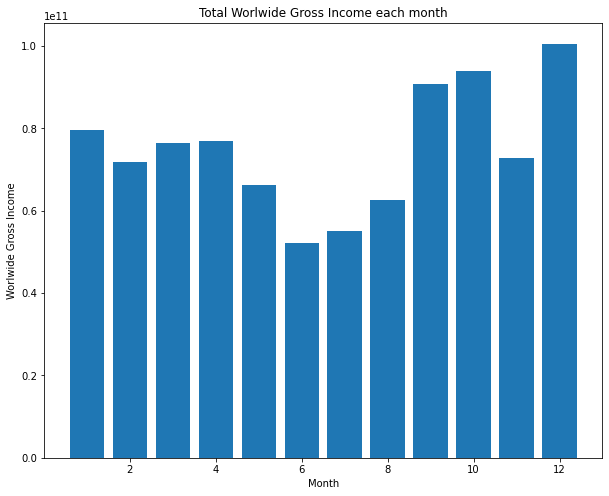

In [54]:
df_grouped = final.groupby('Month')['Box_Office($)'].sum().reset_index()
plt.figure(figsize=(10, 8))
plt.bar(x=df_grouped['Month'], height=df_grouped['Box_Office($)'])
plt.xlabel('Month')
plt.ylabel('Worlwide Gross Income')
plt.title("Total Worlwide Gross Income each month")
plt.show();

The total gross income is high during the start of year and it is lowest in the mid-year i.e. in the month of June. It also increases as it reaches at the end of year. It seems movies are doing good at the end or at the beginning of year.

We will use count function first to count number of movies produced over each month, then use plt function to plot the time series plot. We want to know if producers or production companies have strategies with the release dates to specific months. Using this plot, we can know how much movies are producted in each month on average and see if there specific months that produces will produce more movies or produce less movies.Then, we can make inference about the reasons.


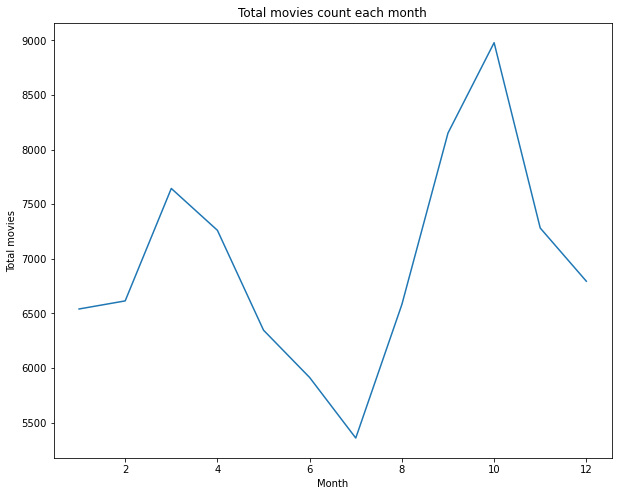

In [55]:
# Count number of movies produced over  each month and groupby
df_grouped = final.groupby('Month')['Imdb_Title_Id'].count().reset_index()
# plot the time serie plot "Total movies count each month'
plt.figure(figsize=(10, 8))
plt.plot(df_grouped['Month'], df_grouped['Imdb_Title_Id'])
plt.xlabel('Month')
plt.ylabel('Total movies')
plt.title("Total movies count each month")
plt.show()

 From the above plot, it is evident that the number of movies are released more at the end of the year. We can see that more movies are produced at the end of each year. This is because of Christmas and New Year. People will have more time to watch movies between October and December. In comparison, there will be a lot less movie productions from April to July. From July to October, the production of movies increased significantly. This is because of the school's summer vacation. Teachers and students have more time to watch movies during this time. Hence, producers or production companies seems to strategize the release dates to specific months.

### Question 5: 

We will analyze movie descriptions. Filmmaking is not a simple process. A good movie depends not only on a good director but on rest of the team including editors, cinematographers, actors, producers, writers and others. A screenplay is the heart of a film which provides the story and the blueprint of the entire process. Though the writing process is based on creativity, it is also dependent on a few business parameters. A films story is dependent on the current societal demand; what people like, stories that resonate with the majority of audience such musicals. Film production houses take these parameters into account while making decisions, parameters that will lead to the film being liked by a large audience and in turn generating large revenue for the film. We will analyze past films to identify the patterns. 

Film descriptions are a short summary of what the audience should expect from the film. We will analyze descriptions  of films that have scored more than 6.5 on IMDB. This range includes below expectation, average, good and best films. The aim is to identify keywords from the descriptions that will help in uderstanding story elements that work for good films. 

In [56]:
# Importing nltk for NLP
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from wordcloud import WordCloud
import nltk

We will use stopwords that will help remove conjunctions and other elements from the descriptions. 

Additionally, we will also remove words that are smaller than 4 characters. 

In [57]:
# Setting the stopwords to English
stopwords = set(stopwords.words('english'))
detokenizer = TreebankWordDetokenizer()

In [58]:
# Converting the Description column to string type to do NLP
final = final.astype({'Description':'string'})

# Selecting Films that have an average score greater than 5.9
good_films = final[final['Avg_Vote']>6.5].copy()


# Copying the data to a new dataframe to work on the NLP
description = good_films['Description'].dropna().copy()

 The above code filters out movies that have an average rating of less than 6.5. Additionally, I have dropped the na values from the data for our analysis. 

In [59]:
# Creating a function to remove tokenize the words in teh description 
# Removing the stopwords from the data
def cleaned_desc(desc):
    desc = word_tokenize(desc.lower())
    desc = [token for token in desc if token not in stopwords and token.isalpha() and len(token) > 4 and token !='story']
    return detokenizer.detokenize(desc)

good_films.loc[:,'clean_description'] = description.apply(cleaned_desc)

In [60]:
# Counting the occurence of the words in the description
word_description = good_films['clean_description'].str.split(expand=True).stack().value_counts()

In [61]:
# Displaying the word_description in descending order
word_description.sort_values(ascending=False)

young       3504
family      2139
woman       1990
father      1453
world       1274
            ... 
aumont         1
amoeban        1
héracles       1
chiisana       1
pinball        1
Length: 33703, dtype: int64

We will create a word cloud of the most occuring words int eh movie descriptions for films that have a rating higher than 6.5. We are passing a dictionary of the words and their counts into the WordCloud function. 

In [62]:
#Creating a dictionary of the count values of the description
temp = word_description.to_dict()

In [63]:
# Creating the word cloud and setting the parameters.
word_cloud = WordCloud(collocations = True, background_color = 'white', width=3000, height=2000, max_words=100)

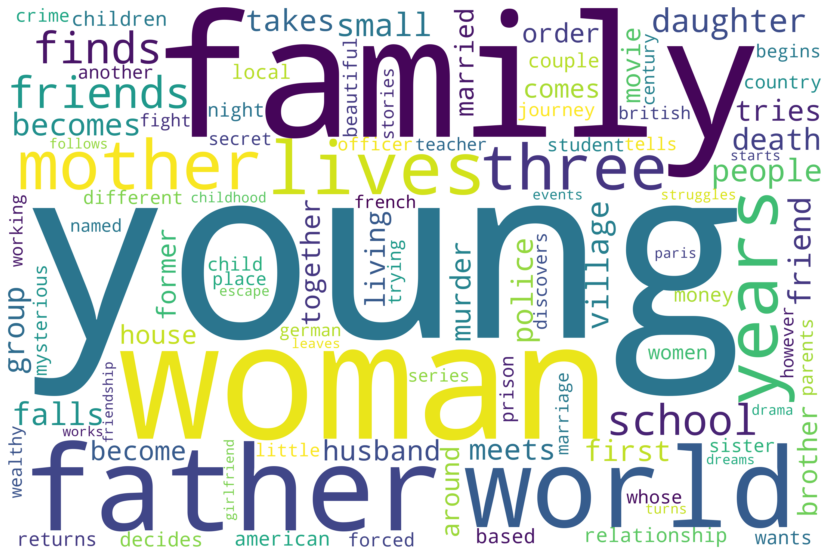

In [64]:
# Generating a word count from the word frequencies
word_cloud.generate_from_frequencies(temp)

#Setting the figure size
plt.figure(figsize=[15,10])
plt.axis("off")

#displaying the word cloud
plt.imshow(word_cloud, interpolation='bilinear');

From the above word cloud, we can see that 'Young' is the word that occurs the most in movie descriptions. This is followed by Family, woman, father and so on. This suggests that a majority of successful films have some element related to 'young' which can be a movie with characters that are young. 
The following can be inferred:

1) Movies about kids or young aged individuals fair well with the audience. 

2) The movie can include a younger representation of the characters. 


Family suggests that the audience like movies that revolve around families, or that include a family. Similarly, woman characters resonate well with the crowd. 

This can provide not only screenwriters, but every individual in the filmmaking process, a roadmap in creating a successful film. 

## Conclusion

The film industry till now was focused on operating on gut instinct.But, data analysis helps in breaking down huge datasets and revealing patterns that are not visible to humans. We used data to extract valuable information for the entertainment industry which includes writers, actors, producers and directors. This shows that AI has the potential to revolutionize films and will have a big impact on what we will watch in the future.